# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Azis Muhammad Ihsan
- **Email:** azis00028@gmail.com
- **ID Dicoding:** azismihsan

## Menentukan Pertanyaan Bisnis

- Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit ?
- Pada musim apa penyewaan sepeda paling banyak
- Bagaimana performa penjualan perusahaan dalam beberapa tahun terakhir?
- Seberapa banyak seseorang yang memilih registered dibandingkan dengan casual

## Import Semua Packages/Library yang Digunakan

In [11]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [12]:
# Load Dataset Days
day_df = pd.read_csv("/content/sample_data/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
#  Load Dataset Hours
hour_df = pd.read_csv("/content/sample_data/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [14]:
#checking data type
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [15]:
#check missing value in dataset day
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [16]:
#check missing value in dataset hour
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


dapat dilihat bahwa tidak ada missing value di dataframe hour_df dan day_df

In [17]:
#check duplicate in hour&day
print("Total Duplicate: ", hour_df.duplicated().sum())
print("Total Duplicate: ", day_df.duplicated().sum())

Total Duplicate:  0
Total Duplicate:  0


Ketika menjalankan kode di atas, kita akan melihat bahwa tidak terdapat data yang terduplikat.

In [18]:
#checks the statistical parameters of the numeric columns contained in day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [19]:
#checks the statistical parameters of the numeric columns contained in hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

- Kita akan menghapus kolom instant dan workingday. untuk workingday menurut saya sudah diwakili oleh weekday, dan untuk instant tidak ada hubungannya
- Disini kita akan menggunakan tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit' karena mereka semua memiliki data dengan beberapa varian
- Categorical data adalah kumpulan informasi yang berbentuk kelompok/group
- Kita akan menghandling tipe data dteday yang tadinya 'object' akan kita ubah menjadi 'datetime'
- Mengganti nama kolom agar lebih mudah dibaca
- Mengkonversi isi kolom agar mudah dipahami
- Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays

# Dropping

In [20]:
# remove the “workingday” column
hour_df.drop(['workingday'], axis = 1, inplace= True)
day_df.drop(['workingday'], axis = 1, inplace= True)

## Change the data type

int to category

In [21]:
# change the int data type to category in the columns 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

object to datetime

In [22]:
# handling the dteday data type which was previously 'object' we will change it to 'datetime'
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

## Rename

Renamed columns to make them easier to read in the day_df dataset

In [23]:
# Rename the column to make it easier to read in dataset day_df
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [24]:
# Rename columns to make them easier to read in hour_df dataset
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [25]:
# Convert column contents for easy understanding
# convert seasons into: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# of month conversions to: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# convert weather situation into: 1:Sunny, 2:Foggy, 3:Light Rain/Snow 4:Heavy Rain/Snow
day_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# one_of_week conversion to: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# year conversion to: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

# Calculating Humidity
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100



Create a new column called category_days that indicates whether the contents of the column are weekend or weekdays.

In [26]:
# Create a new column called category_days that indicates whether the column contents are weekend or weekdays
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)

In [27]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Too dry"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Too Moist"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

dapat dilihat,

- kita sudah menghapus kolom instant dan workingday ✓
- tipe data pada kolom dteday sudah berubah menjadi datetime ✓
- tipe data int pada season, mnth, holiday, weekday, workingday, - weathersit sudah berubah menjadi tipe data category ✓
- Sudah mengganti nama kolom agar lebih mudah dibaca ✓
- Sudah Mengkonversi isi kolom agar mudah dipahami ✓
- Sudah membuat kolom baru bernama category_days yang berisi weekend atau weekdays ✓



## Exploratory Data Analysis (EDA)

### Explore Data hour_df

In [28]:
# view statistical parameter summaries of hour_df data
hour_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Too Moist
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah pelanggan sebanyak 17379. Berdasarkan data yang ditampilkan range antara jam 00.00 sampai 23.59, memilliki rata-rata penyewaan sepeda terjadi pada jam 11.54 dengan standar deviasinya sebesar 6.91

In [29]:
# hourly rentals
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


Berdasarkan pivot table di atas, dapat diketahui bahwa pelanggan yang memilliki banyak menyewa sepeda terjadi pada jam 17.00 sedangkan penyewaan sepeda yang paling sedikit dimiliki pada jam 04.00

### Explore Data day_df

In [30]:
# view statistical parameter summaries of day_df data
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah pelanggan sebanyak 17379 orang di musim 1 - 4 memiliki top

In [31]:
# see the number of rentals per season
day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

<ipython-input-31-343ca4a12cf7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)


,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


berdasarkan hasil tersebut, diketahui bahwa season fall dan summer merupakan dua musim yang memiliki jumlah terbanyak.

In [32]:
# view the number of rentals per year by registered and casul
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


berdasarkan gambar diatas, seseorang yang sudah menjadi member dengan belum menjadi member memiliki nilai yang cukup jauh, seseorang yang sudah mempunyai member pada tahun 2011 sebanyak 995851 sedangkan yang belum menjadi member sebanyak 247252

dapat dilihat dari gambar diatas, bahwa tanggal merah memilki peminat penyewaan sepeda lebih sedikit dibandingkan pada tanggal biasa.


## Visualization & Explanatory Analysis

- Jam berapa yang paling banyak dan paling sedikit disewa?
- Pada musim apa penyewaan sepeda paling banyak?
- Bagaimana performa penjualan perusahaan dalam beberapa tahun terakhir?
- Seberapa banyak seseorang yang memilih registered dibandingkan dengan casual?

### Pertanyaan 1: Jam berapa yang paling banyak dan paling sedikit disewa?

In [33]:
# grouping hours and count_cr
sum_order_items_df = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()

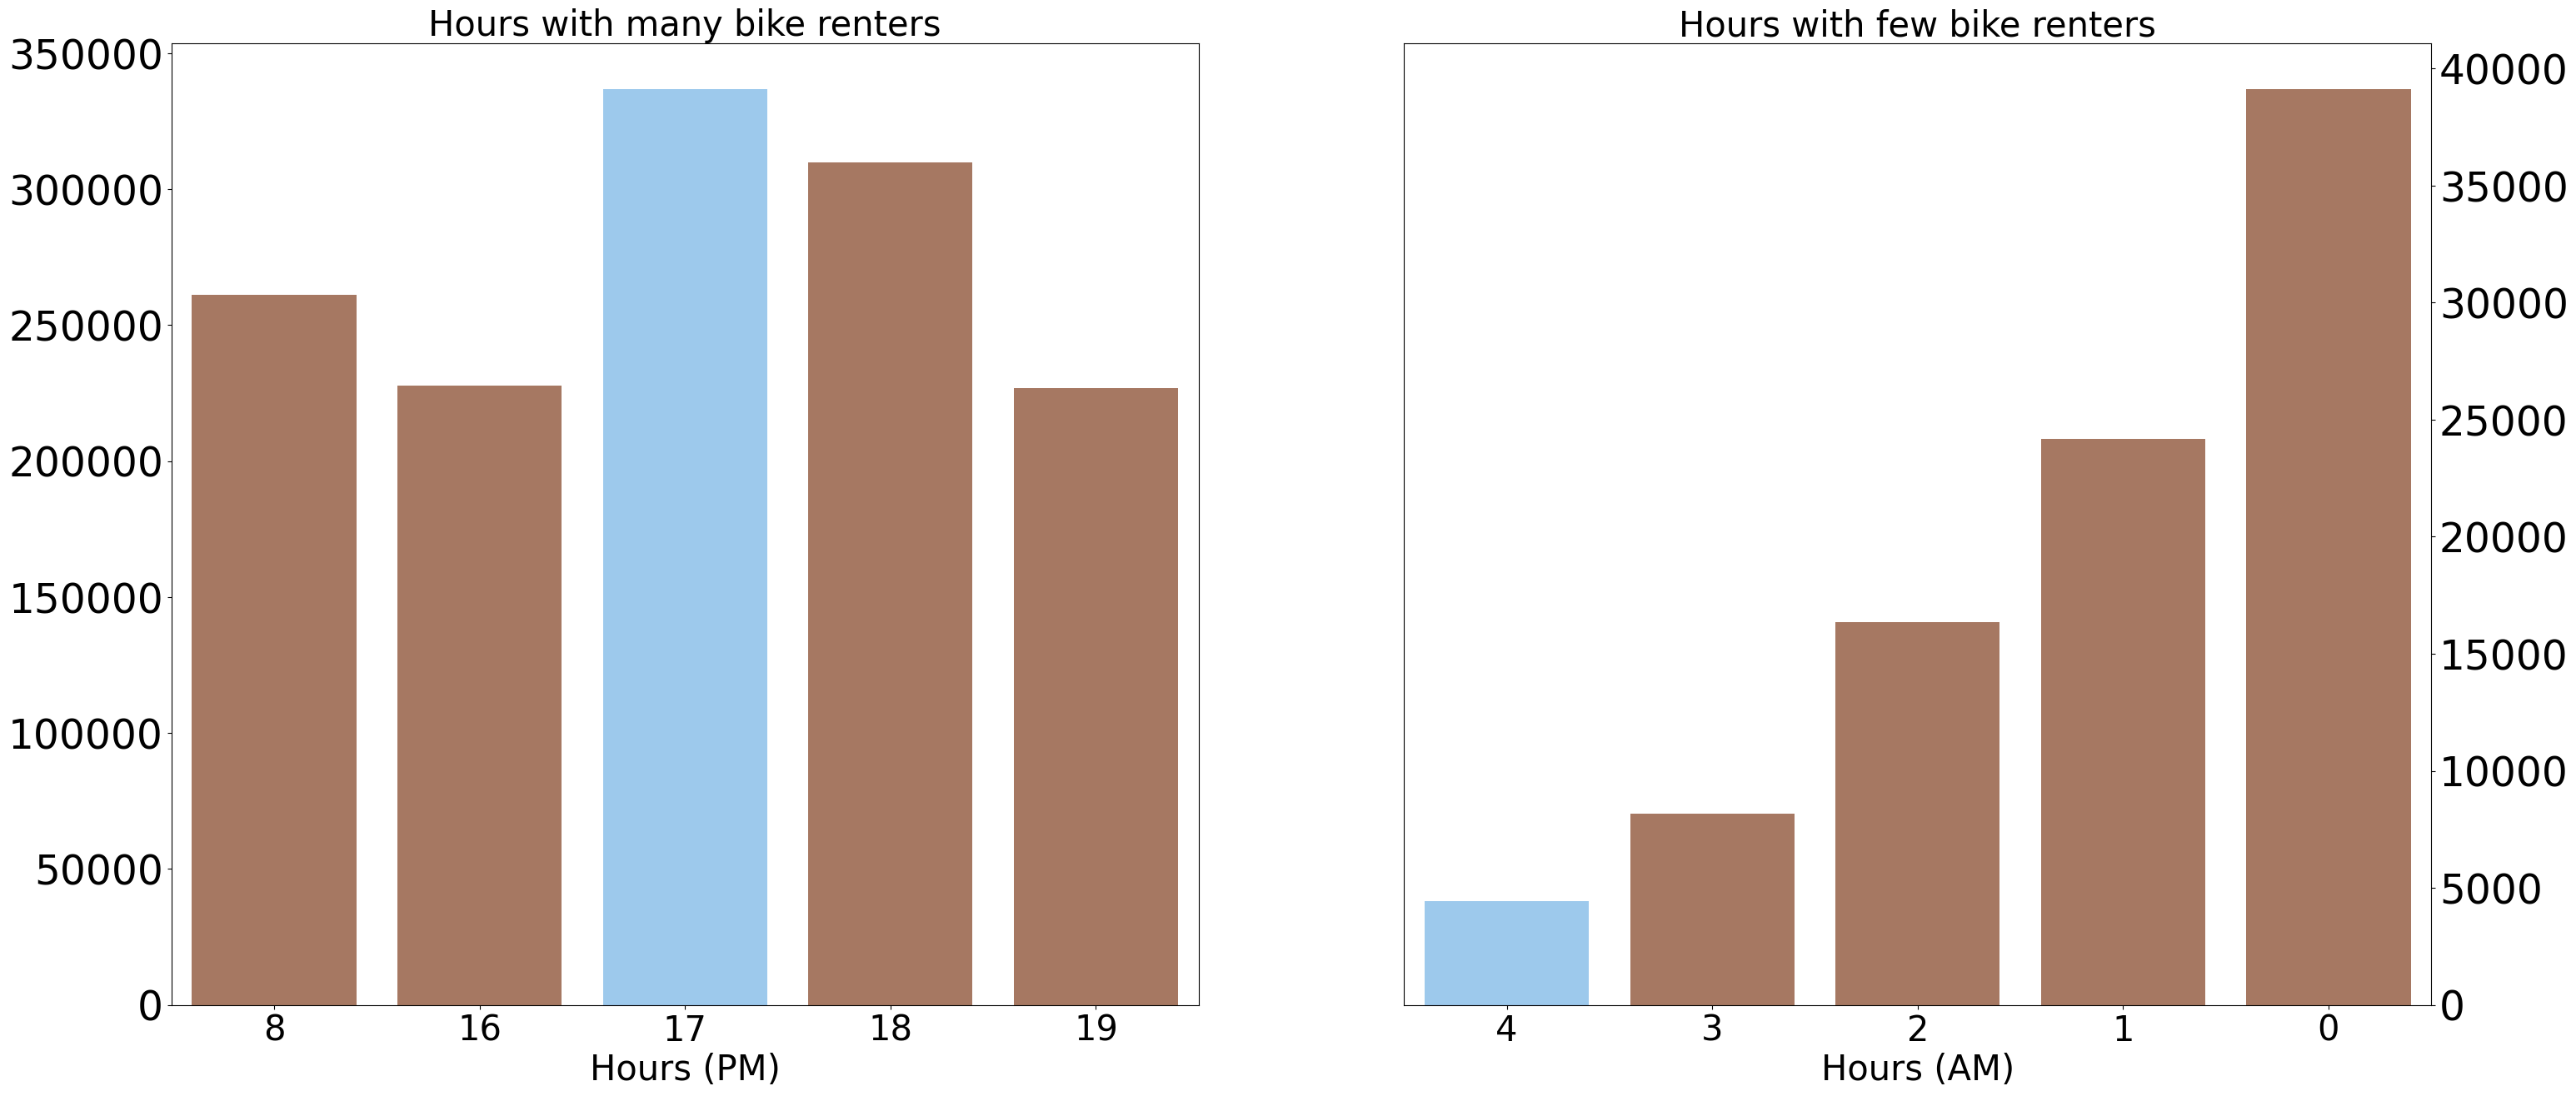

In [37]:
# Create a bar chart to see the difference in bike rentals by hour
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# create a barplot for the most bike renters
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), hue="hours", palette=["#B17457", "#B17457", "#90CAF9", "#B17457", "#B17457"], legend=False, ax=ax[0])

# set the label and title for the first subplot
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Hours with many bike renters", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# create a barplot for the least bike renter
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5), hue="hours", palette=["#B17457", "#B17457", "#B17457", "#B17457","#90CAF9"], legend=False, ax=ax[1])

# set the label and title for the first subplot
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=30)
ax[1].set_title("Hours with few bike renters", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

# display plot
plt.show()

Berdasarkan gambar di atas, Anda dapat melihat bahwa penyewaan sepda paling banyak digunakan pada jam 17:00 sekitar 336860 penyewaan. Kontras dengan hal tersebut, penyewaan pada jam 04:00 merupakan produk yang paling sedikit terjual sekitar 4428 penyewaan.

### Pertanyaan 2: Pada musim apa penyewaan sepeda paling banyak?

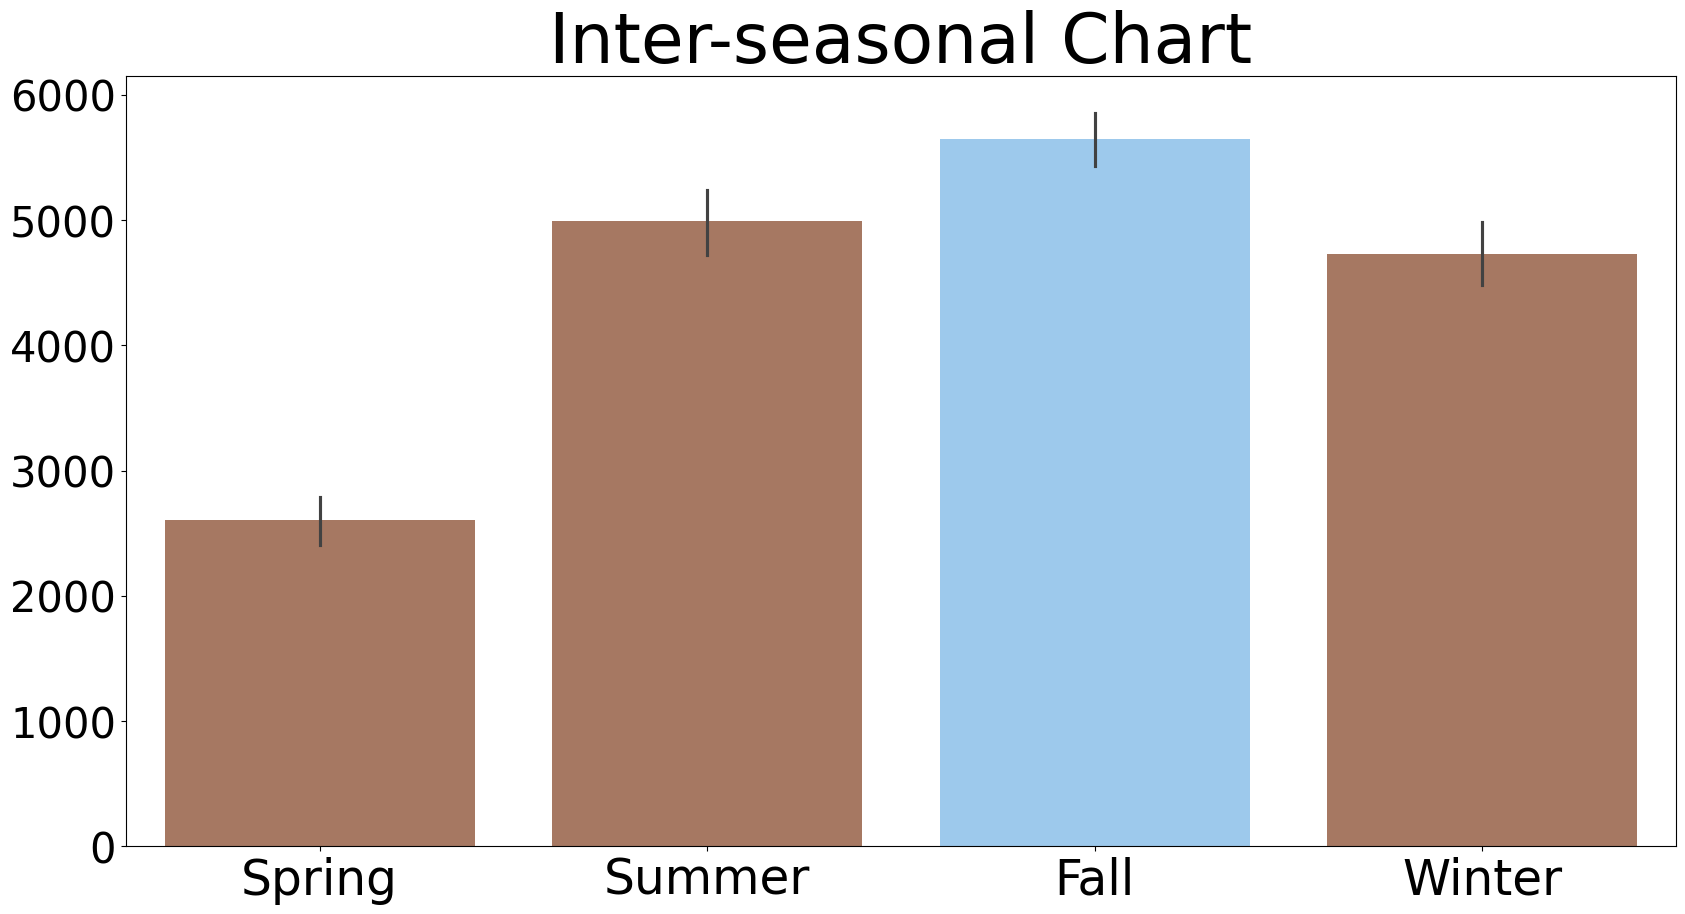

In [38]:
# set color
colors = ["#B17457", "#B17457", "#90CAF9", "#B17457"]

# create a subplot with 1 row and 1 column, with size (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Create a barplot for y=“count_cr” and x=“season”, using data=day_df
sns.barplot(
        y="count_cr",
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=colors,
        hue="season",  # Gunakan hue berdasarkan variabel season
        legend=False,  # Nonaktifkan legenda
        ax=ax
    )

# set the title, y and x labels, and check parameters for the subplot
ax.set_title("Inter-seasonal Chart", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# display the plot
plt.show()

Musim yang paling banyak disewa ialah pada musim Fall (musim gugur) dengan total penyewaan pada musim gugur sebanyak 1061129 penyewaan

### Pertanyaan 3: Bagaimana performa penjualan perusahaan dalam beberapa tahun terakhir?

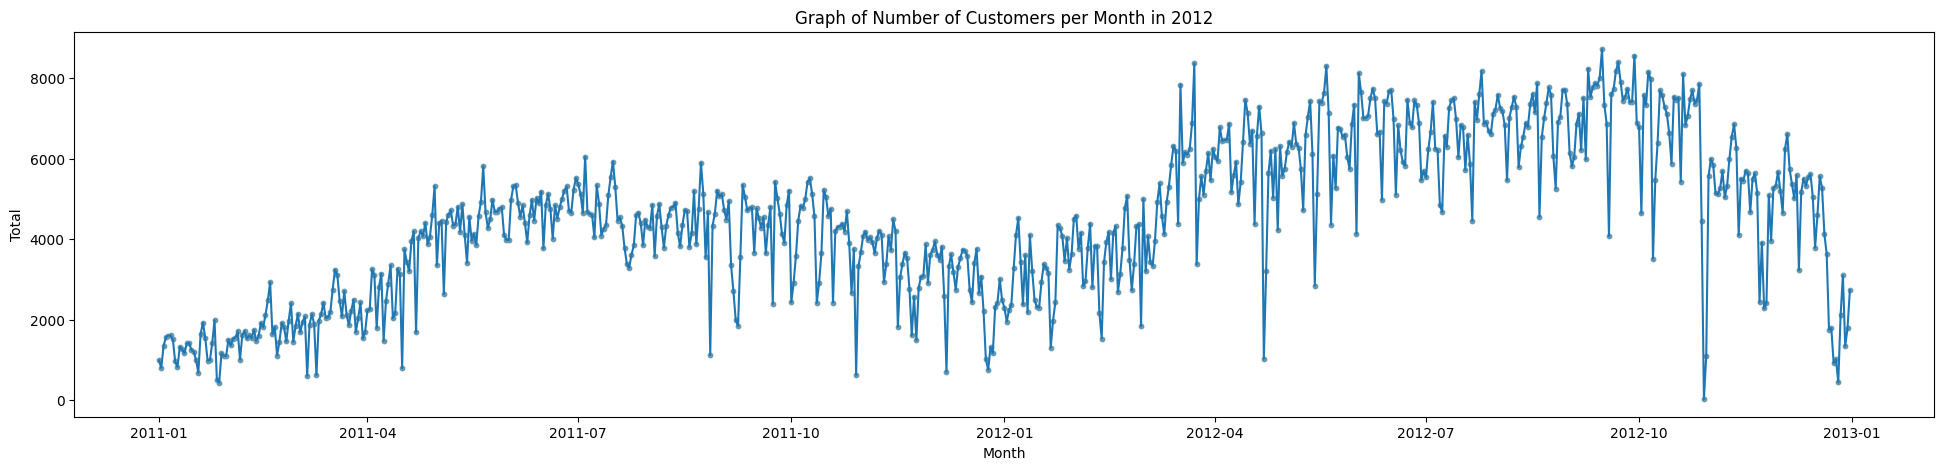

In [40]:
# create a figure with size (24, 5)
plt.figure(figsize=(24, 5))

# calculate the maximum number of customers per month
monthly_counts = day_df['count_cr'].groupby(day_df['dteday']).max()

# create a scatter plot for the maximum number of customers per month, with blue color and marker 'o'
plt.scatter(monthly_counts.index, monthly_counts.values, c="#6A9AB0", s=10, marker='o')

# create a line plot for the maximum number of customers per month
plt.plot(monthly_counts.index, monthly_counts.values)

# naming for x-axis
plt.xlabel('Month')

# naming for y-axis
plt.ylabel('Total')

# create a title
plt.title('Graph of Number of Customers per Month in 2012')

# display the plot
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah order terbanyak terjadi pada bulan September. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan November dan December.

### Pertanyaan 4: Seberapa banyak seseorang yang memilih registered dibandingkan dengan casual?

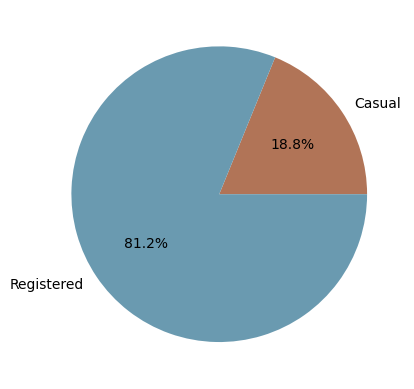

In [41]:
# Sum all elements in the casual column
total_casual = sum(day_df['casual'])

# Sum all elements in the registered column
total_registered = sum(day_df['registered'])

# Create data for pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Creating a pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#B17457", "#6A9AB0"])

# Display the pie plot
plt.show()

Seseorang yang sudah registered sebanyak 81.2%, sedangkan sesorang yang belum melakukan regsitered (casual) sebanyak 18.8%

## Conclusion



Pertanyaan:
- Pertanyaan 1: pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit ?
- Pertanyaan 2: pada musim apa penyewaan sepeda paling banyak?
- Pertanyaan 3: Bagaimana performa penjualan perusahaan dalam beberapa tahun terakhir?
- Pertanyaan 4: Seberapa banyak seseorang yang memilih registered dibandingkan dengan casual?
----
-- Conclution pertanyaan 1: Berdasarkan gambar di atas, Anda dapat melihat bahwa penyewaan sepda paling banyak digunakan pada jam 17:00. Kontras dengan hal tersebut, penyewaan pada jam 04:00 merupakan produk yang paling sedikit terjual.

-- Conclution pertanyaan 2: pada musim Fall (musim gugur).

-- Conclution pertanyaan 3: Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah order terbanyak terjadi pada bulan September 2012. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan januari 2011.

-- Conclution pertanyaan 4: Seseorang yang sudah registered sebanyak 81.2% sedangkan sesorang yang belum melakukan regsitered (casual) sebanyak 18.8%

# Apply advanced analysis techniques

## 1. Analisis Clustering

Disini saya akan menggunakan teknik analisis lanjutan berupa clustering analisis

**Total users by weather_situation**

In [42]:
# analysis Clustering
hour_df.groupby(by="weather_situation", observed=False).count_cr.nunique().sort_values(ascending=False)

,count_cr
weather_situation,
Clear,848
Misty,649
Light_rainsnow,368
Heavy_rainsnow,3


kita dapat mengidentifikasi kelompok pengguna yang lebih cenderung menyewa sepeda pada hari-hari yang clear

**Total Users by Humidity**

In [43]:
#Total humidity
hour_df.groupby(by="humidity_category").agg({
    "count_cr": ["count"]})

,count_cr
,count
humidity_category,
Ideal,5505
Too Moist,8356
Too dry,3518


kita dapat mengidentifikasi kelompok pengguna yang lebih cenderung menyewa sepeda pada humidity terlalu lembab

## 2. RFM Analysis

RFM Analysis dibawah ini digunakan untuk memahami perilaku pelanggan dari tiga faktor utama:

    - Recency (how recently customers interact with the business)
    - Frequency (how many times the customer interacts)
    - Monetary (how much money they use)

In [44]:
#RFM analysis
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count_cr': 'sum'  # Monetary
}).reset_index()

# Rename a column
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602
